In [26]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'../data/tokenized.csv')
df

,post,gender,tokenized
0,Long time no see. Like always I was rewriting...,0,"['long', 'time', 'see', 'like', 'always', 'rew..."
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,0,"['guest', 'demo', 'eric', 'iverson', '’', 'itt..."
2,Who moved my Cheese??? The world has been de...,0,"['move', 'cheese', 'world', 'develop', 'area',..."
3,Yesterday I attended a biweekly meeting of an...,0,"['yesterday', 'attend', 'biweekly', 'meeting',..."
4,Liam is nothing like Natalie. Natalie never w...,1,"['liam', 'nothing', 'like', 'natalie', 'natali..."
...,...,...,...
3213,It was a scavenger style race with checkpoints...,0,"['scavenger', 'style', 'race', 'checkpoint', '..."
3214,Finally! I got a full day's work done. Almost ...,1,"['finally', 'get', 'full', 'day', 'work', 'do'..."
3215,"At the height of laughter, the universe is flu...",0,"['height', 'laughter', 'universe', 'flung', 'k..."
3216,"I like birds, especially woodpeckers and MOST ...",0,"['like', 'bird', 'especially', 'woodpecker', '..."


In [25]:
from ast import literal_eval

print(df['tokenized'][0][0])
df['tokenized'] = df['tokenized'].apply(literal_eval)
print(df['tokenized'][0][0])

[
long


### Check if data distribution between male and female is equal

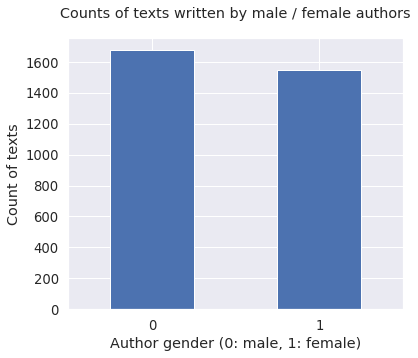

0    1673
1    1545
Name: gender, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)
df['gender'].value_counts().plot(kind='bar', rot=0, figsize=(6,5))
plt.xlabel("Author gender (0: male, 1: female)")
plt.ylabel("Count of texts")
plt.title("Counts of texts written by male / female authors", y=1.05)
plt.show()

print(df['gender'].value_counts())

Check distribution of post length

In [5]:
post_lengths = df['post'].str.split().str.len()

print("Minimum post length: " + str(min(post_lengths)))
print("Maximum post length: " + str(max(post_lengths)))
print("Average post length: " + str(np.mean(post_lengths)))
print("Median:              " + str(np.median(post_lengths)))

Minimum post length: 11
Maximum post length: 6148
Average post length: 420.16376631448105
Median:              194.0


In [6]:
# most frequent post length
counts = np.bincount(post_lengths)
print("Most frequent post length: " + str(np.argmax(counts)))

Most frequent post length: 90


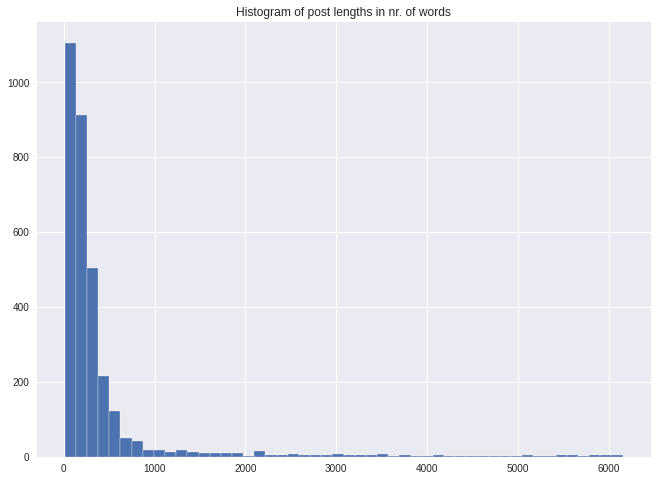

In [7]:
plt.figure(figsize=(11,8))
plt.style.use('seaborn')
plt.hist(post_lengths, bins=50)
plt.title("Histogram of post lengths in nr. of words")
plt.show()

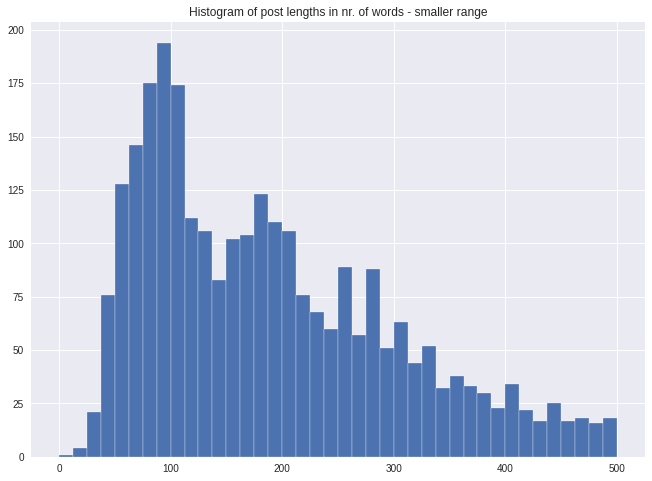

In [8]:
plt.figure(figsize=(11,8))
plt.style.use('seaborn')
plt.hist(post_lengths, bins=40, range=[0, 500])
plt.title("Histogram of post lengths in nr. of words - smaller range")
plt.show()

In [9]:
import nltk
import string
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/lisa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lisa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lisa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/lisa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# tag map for POS tag (needed for lemmatization)
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV

def preprocess(text):
    
    # transform to lower-case and remove punctuation
    text_p = "".join([char for char in text.lower() if char not in string.punctuation])
    
    # transform to lower-case but keep punctuation -> maybe punctuation differs between men and women?
    #text_p = text.lower()

    # split tokens
    words = word_tokenize(text_p)
    
    # remove common english stopwords
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]

    # lemmatization (convert each token to its base form)
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for token, tag in pos_tag(filtered_words):
      lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
      lemmatized.append(lemma)
    
    return lemmatized

In [27]:
print(df['post'][0])
print(preprocess(df['post'][0]))

 Long time no see. Like always I was rewriting it from scratch a couple of times. But nevertheless it's still java and now it uses metropolis sampling to help that poor path tracing converge.

Btw. I did MLT on yesterday evening after 2 beers (it had to be Ballmer peak).

Altough the implementation is still very fresh it easily outperforms standard path tracing, what is to be seen especially when difficult caustics are involved.

I've implemented spectral rendering too, it was very easy actually, cause all computations on wavelengths are linear just like rgb. But then I realised that even if it does feel more physically correct to do so, whats the point? 3d applications are operating in rgb color space, and because I cant represent a rgb color as spectrum interchangeably I have to approximate it, so as long as I'm not running a physical simulation or something I don't see the benefits (please correct me if I'm wrong), thus I abandoned that.
['long', 'time', 'see', 'like', 'always', 're

In [28]:
df

,post,gender,tokenized,cleaned
0,Long time no see. Like always I was rewriting...,0,"[long, time, see, like, always, rewrite, scrat...",[]
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,0,"[guest, demo, eric, iverson, ’, itty, bitty, s...",[]
2,Who moved my Cheese??? The world has been de...,0,"[move, cheese, world, develop, area, create, d...",[]
3,Yesterday I attended a biweekly meeting of an...,0,"[yesterday, attend, biweekly, meeting, informa...",[]
4,Liam is nothing like Natalie. Natalie never w...,1,"[liam, nothing, like, natalie, natalie, never,...",[]
...,...,...,...,...
3213,It was a scavenger style race with checkpoints...,0,"[scavenger, style, race, checkpoint, throughou...",[]
3214,Finally! I got a full day's work done. Almost ...,1,"[finally, get, full, day, work, do, almost, 4k...",[]
3215,"At the height of laughter, the universe is flu...",0,"[height, laughter, universe, flung, kaleidosco...",[]
3216,"I like birds, especially woodpeckers and MOST ...",0,"[like, bird, especially, woodpecker, especiall...",[]


In [13]:
#tokenized = []
#for post in df['post']:
#  tokenized.append(preprocess(post))

In [14]:
#print(df['post'][0])
#print(tokenized[0])

#print("")

#print(df['post'][100])
#print(tokenized[100])

In [15]:
#df['tokenized'] = tokenized
#df

## Topic analysis

In [29]:
# clean the data
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_spacy(text):
  doc = nlp(text,  disable=["parser", "ner"])
  result = []

  for token in doc:
    if not token.is_stop and token.is_alpha and len(token)>=3:
      result.append(token.lemma_)

  return result

In [30]:
nested = []

for doc in df['tokenized']:
  nested.append(preprocess_spacy(' '.join(doc)))

In [31]:
df['cleaned'] = nested

In [32]:
print(df['cleaned'][0])
print("")
print(df['post'][0])

['long', 'time', 'like', 'rewrite', 'scratch', 'couple', 'time', 'java', 'metropolis', 'sample', 'help', 'poor', 'path', 'trace', 'converge', 'btw', 'mlt', 'yesterday', 'beer', 'ballmer', 'peak', 'altough', 'implementation', 'fresh', 'easily', 'outperform', 'standard', 'path', 'trace', 'especially', 'difficult', 'caustic', 'involve', 'implement', 'spectral', 'render', 'easy', 'actually', 'cause', 'computation', 'wavelength', 'linear', 'like', 'rgb', 'realise', 'feel', 'physically', 'correct', 'point', 'application', 'operate', 'rgb', 'color', 'space', 'represent', 'rgb', 'color', 'spectrum', 'interchangeably', 'approximate', 'long', 'run', 'physical', 'simulation', 'benefit', 'correct', 'wrong', 'abandon']

 Long time no see. Like always I was rewriting it from scratch a couple of times. But nevertheless it's still java and now it uses metropolis sampling to help that poor path tracing converge.

Btw. I did MLT on yesterday evening after 2 beers (it had to be Ballmer peak).

Altough th

## K-means clustering

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def dummy(doc):
    return doc

vec = TfidfVectorizer(tokenizer=dummy, preprocessor=dummy, min_df=5, max_df=0.9)
posts = vec.fit_transform(nested)

In [28]:
def get_top_keywords(k, n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10).fit(posts)
    
    tmp = pd.DataFrame(posts.todense()).groupby(kmeans.labels_).mean() # groups the TF-IDF vector by cluster
    terms = vec.get_feature_names_out() # access tf-idf terms
    for i,r in tmp.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score    
    
    sns.set(font_scale=1.0)
    pd.DataFrame(kmeans.labels_).value_counts().sort_index().plot(kind='bar', figsize=(4,3))



Cluster 0
time,like,love,god,know,guy,abt,person,good,friend

Cluster 1
people,know,think,work,good,year,use,like,new,time

Cluster 2
calorie,diet,muscle,fat,skin,man,weight,food,woman,eat

Cluster 3
year,like,season,topps,player,baseball,team,card,play,game

Cluster 4
child,teach,high,day,kid,year,lunch,teacher,student,school

Cluster 5
good,people,feel,want,thing,day,know,like,think,time


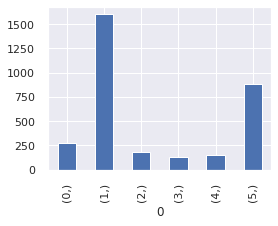

In [29]:
get_top_keywords(6, 10)


Cluster 0
site,user,web,google,use

Cluster 1
muscle,fat,weight,man,woman

Cluster 2
know,year,good,like,time

Cluster 3
player,team,play,card,game

Cluster 4
student,food,lunch,eat,school

Cluster 5
god,good,person,abt,friend

Cluster 6
insurance,care,company,car,health

Cluster 7
day,know,like,think,time


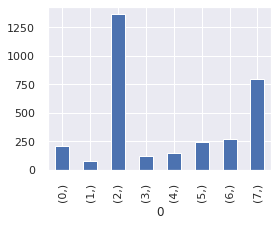

In [30]:
get_top_keywords(8, 5)


Cluster 0
like,write,twitter,song,comment,new,video,site,post,blog

Cluster 1
know,like,come,run,good,season,player,team,play,game

Cluster 2
reform,democrat,bill,republican,vote,president,insurance,obama,care,health

Cluster 3
time,flight,like,new,skin,company,island,use,car,service

Cluster 4
live,good,feel,want,time,think,people,know,life,love

Cluster 5
frnd,tat,like,know,god,guy,person,good,abt,friend

Cluster 6
rice,cook,day,dog,student,meal,school,lunch,food,eat

Cluster 7
want,work,feel,good,thing,think,know,day,time,like

Cluster 8
look,high,exercise,lose,guy,fat,muscle,weight,man,woman

Cluster 9
use,thing,day,know,good,think,like,work,year,time


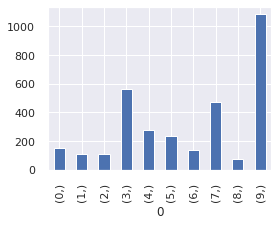

In [31]:
get_top_keywords(10, 10)


Cluster 0
love,time,dance,straighten,like,album,band,hair,music,song

Cluster 1
find,little,think,know,good,look,year,like,day,time

Cluster 2
like,exercise,lose,guy,muscle,fat,weight,skin,man,woman

Cluster 3
like,high,eat,kid,day,food,teacher,student,lunch,school

Cluster 4
fun,like,frnd,tat,know,guy,person,good,abt,friend

Cluster 5
like,win,baseball,run,good,season,player,team,play,game

Cluster 6
new,twitter,phone,service,device,web,user,use,google,site

Cluster 7
thing,love,time,people,think,want,god,feel,know,life

Cluster 8
democrat,reform,president,republican,vote,bill,insurance,obama,care,health

Cluster 9
good,use,thing,like,work,year,time,new,think,people

Cluster 10
character,like,story,director,actor,scene,book,watch,film,movie

Cluster 11
know,year,post,good,day,work,think,like,time,blog


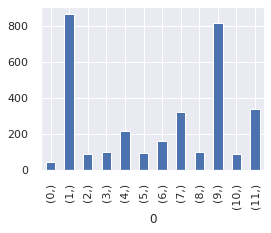

In [32]:
get_top_keywords(12, 10)

## Cluster analysis

In [33]:
## seems to look good with 8 clusters
k = 8
n = 15
kmeans = KMeans(n_clusters=k, random_state=1, n_init=10).fit(posts)
df['cluster'] = kmeans.labels_

In [34]:
pd.DataFrame(kmeans.labels_).value_counts().sort_index()

0     206
1      73
2    1365
3     120
4     149
5     239
6     267
7     799
dtype: int64

In [35]:
tmp = pd.DataFrame(posts.todense()).groupby(kmeans.labels_).mean() # groups the TF-IDF vector by cluster
terms = vec.get_feature_names_out() # access tf-idf terms
for i,r in tmp.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([terms[t] for t in np.argsort(r)[-n:]])) # for each row of the dataframe, find the 15 terms that have the highest tf idf score
    print(df.loc[df['cluster'] == i].gender.value_counts().sort_index())


Cluster 0
work,mobile,datum,new,video,service,model,like,device,phone,site,user,web,google,use
0    170
1     36
Name: gender, dtype: int64

Cluster 1
look,metabolism,thing,burn,calorie,like,high,lose,exercise,guy,muscle,fat,weight,man,woman
0    27
1    46
Name: gender, dtype: int64

Cluster 2
come,want,thing,way,love,new,work,day,find,think,know,year,good,like,time
0    692
1    673
Name: gender, dtype: int64

Cluster 3
sticker,know,sport,year,good,league,like,season,topps,baseball,player,team,play,card,game
0    99
1    21
Name: gender, dtype: int64

Cluster 4
good,meal,think,high,time,like,year,kid,teacher,day,student,food,lunch,eat,school
0     39
1    110
Name: gender, dtype: int64

Cluster 5
thing,lot,wat,gud,frnd,time,tat,like,guy,know,god,good,person,abt,friend
0    135
1    104
Name: gender, dtype: int64

Cluster 6
vote,year,president,service,bill,business,new,obama,government,need,insurance,care,company,car,health
0    184
1     83
Name: gender, dtype: int64

Cluster 7
year

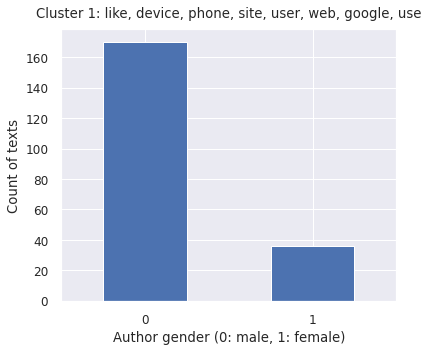

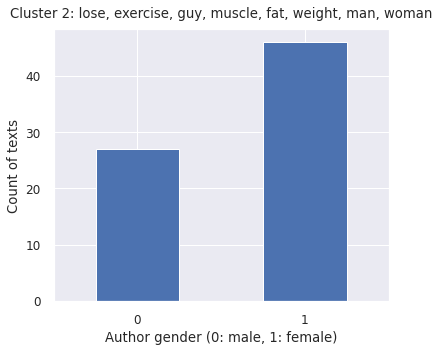

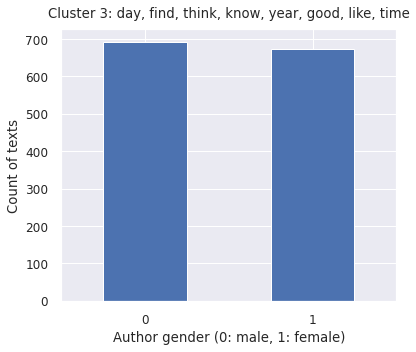

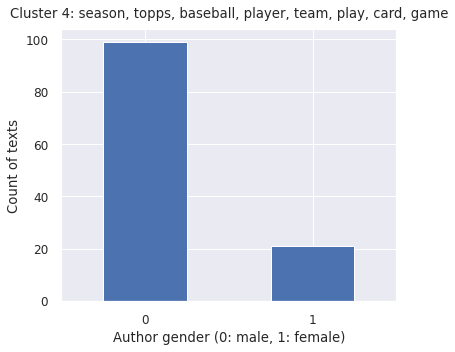

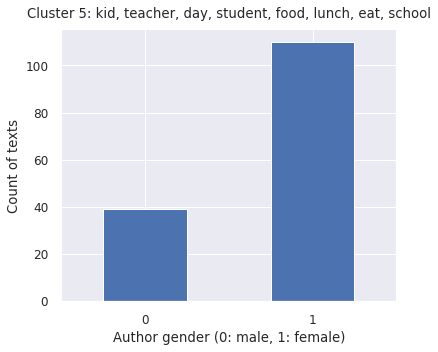

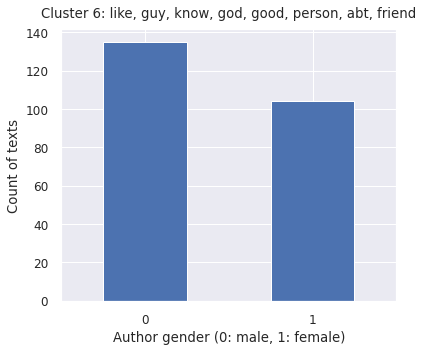

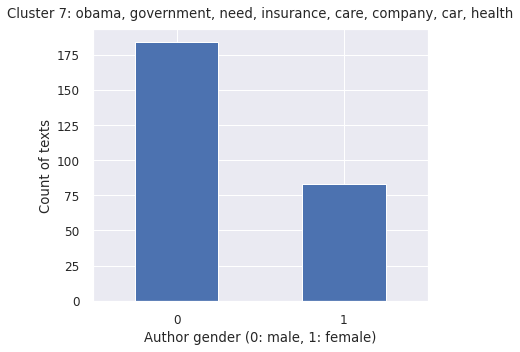

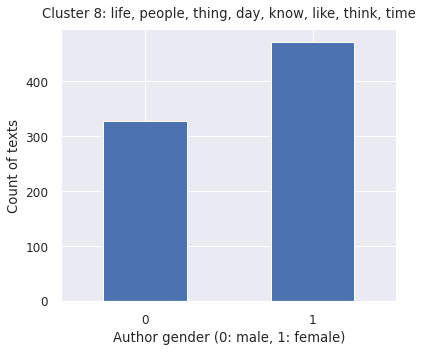

In [36]:
for i,r in tmp.iterrows():
    sns.set(font_scale=1.1)
    df.loc[df['cluster'] == i]['gender'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(6,5))
    plt.xlabel("Author gender (0: male, 1: female)")
    plt.ylabel("Count of texts")
    plt.title("Cluster " + str(i+1) + ": " + ', '.join([terms[t] for t in np.argsort(r)[-8:]]), y=1.02)
    plt.show()

## LDA topic modeling

In [89]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

# Create Dictionary
id2word = Dictionary(df['cleaned'])

# Filter out words that occur less than 10 documents, or more than 50% of the documents.
#id2word.filter_extremes(no_below=10, no_above=0.5)

# Create Corpus
texts = df['cleaned']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [81]:
# View
print(corpus[:1])
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 3), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 2), (56, 1), (57, 1), (58, 1)]]
[[('abandon', 1), ('actually', 1), ('altough', 1), ('application', 1), ('approximate', 1), ('ballmer', 1), ('beer', 1), ('benefit', 1), ('btw', 1), ('cause', 1), ('caustic', 1), ('color', 2), ('computation', 1), ('converge', 1), ('correct', 2), ('couple', 1), ('difficult', 1), ('easily', 1), ('easy', 1), ('especially', 1), ('feel', 1), ('fresh', 1), ('help', 1), ('implement', 1), ('implementation', 1), ('interchangeably', 1), ('involve', 1), ('java', 1), ('like', 2), ('li

In [82]:
# Bag-of-words representation of the documents.
print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 49663
Number of documents: 3218


In [95]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=10, 
                     passes=10,
                     random_state=0,
                     alpha='auto',
                     eta='auto')

lda_model.print_topics()

[(0,
  '0.012*"health" + 0.009*"court" + 0.008*"company" + 0.007*"care" + 0.006*"law" + 0.005*"bill" + 0.005*"accuse" + 0.005*"bail" + 0.005*"reform" + 0.004*"government"'),
 (1,
  '0.009*"que" + 0.005*"para" + 0.005*"click" + 0.004*"mobile" + 0.004*"ver" + 0.004*"haz" + 0.004*"phone" + 0.003*"toda" + 0.003*"aquí" + 0.003*"sobre"'),
 (2,
  '0.007*"use" + 0.006*"work" + 0.006*"like" + 0.006*"new" + 0.005*"find" + 0.005*"site" + 0.005*"color" + 0.004*"time" + 0.004*"look" + 0.004*"paint"'),
 (3,
  '0.006*"game" + 0.005*"good" + 0.004*"time" + 0.004*"think" + 0.004*"year" + 0.004*"work" + 0.004*"use" + 0.004*"way" + 0.004*"team" + 0.004*"new"'),
 (4,
  '0.007*"post" + 0.006*"new" + 0.006*"woman" + 0.004*"collection" + 0.004*"blog" + 0.004*"fashion" + 0.003*"write" + 0.003*"art" + 0.003*"image" + 0.003*"girl"'),
 (5,
  '0.004*"une" + 0.004*"vous" + 0.003*"les" + 0.003*"que" + 0.002*"pour" + 0.002*"nuclear" + 0.002*"hezbollah" + 0.002*"dan" + 0.002*"borscht" + 0.002*"bien"'),
 (6,
  '0.010*

In [96]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score (larger is better)
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['cleaned'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  -8.899103283942004

Coherence Score:  0.4311894022861257


## Divide into training and testing data

In [43]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['gender'], random_state=0)
df_train

,post,gender,tokenized,cleaned,cluster
2218,What? No escape? I thought that I would be ab...,1,"[escape, thought, would, able, get, need, hear...","[escape, thought, able, need, hear, leave, pit...",7
1863,"And all I can say is Thank You, Thank You!!! ...",1,"[say, thank, thank, think, look, another, surg...","[thank, thank, think, look, surgical, procedur...",7
1160,She is a very very sweet girl :)\n\nIts hardly...,1,"[sweet, girl, hardly, 2, month, since, start, ...","[sweet, girl, hardly, month, start, talk, fun,...",5
2865,"I love what Brooke had to say about the event,...",1,"[love, brooke, say, event, also, tidbit, advic...","[love, brooke, event, tidbit, advice, share, e...",2
2802,I have some photos I've been meaning to post f...,1,"[photo, ive, mean, post, david, reid, go, lola...","[photo, mean, post, david, reid, lola, month, ...",2
...,...,...,...,...,...
1943,"So, on my long run of the week I like to conte...",1,"[long, run, week, like, contemplate, thingsthe...","[long, run, week, like, contemplate, thingsthe...",7
1480,Contact lenses require a certain degree of car...,0,"[contact, lenses, require, certain, degree, ca...","[contact, lense, require, certain, degree, car...",2
1690,I didn't start watching AD until way after the...,1,"[didnt, start, watch, ad, way, show, well, lat...","[start, watch, way, late, know, begin, watch, ...",2
1416,"At Creation Moments, Ian Taylor starts by aski...",0,"[creation, moment, ian, taylor, start, ask, sc...","[creation, moment, ian, taylor, start, ask, sc...",7


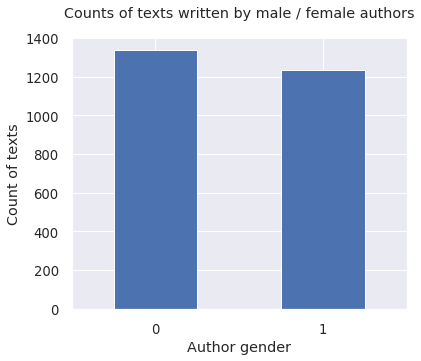

0    1338
1    1236
Name: gender, dtype: int64


In [44]:
sns.set(font_scale=1.2)
df_train['gender'].value_counts().plot(kind='bar', rot=0, figsize=(6,5))
plt.xlabel("Author gender")
plt.ylabel("Count of texts")
plt.title("Counts of texts written by male / female authors", y=1.05)
plt.show()

print(df_train['gender'].value_counts())

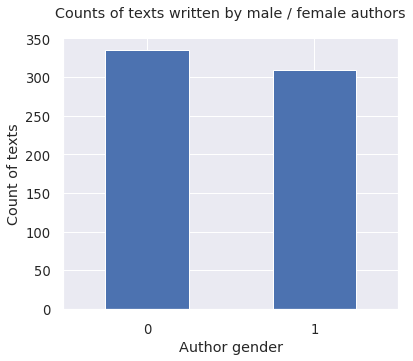

0    335
1    309
Name: gender, dtype: int64


In [45]:
sns.set(font_scale=1.2)
df_test['gender'].value_counts().plot(kind='bar', rot=0, figsize=(6,5))
plt.xlabel("Author gender")
plt.ylabel("Count of texts")
plt.title("Counts of texts written by male / female authors", y=1.05)
plt.show()

print(df_test['gender'].value_counts())

Save to csv

In [46]:
from operator import index

#df_train.to_csv('/content/drive/MyDrive/Colab Notebooks/gender_prediction/data/uic_blogs_gender/train_tokenized.csv', index=False)
#df_test.to_csv('/content/drive/MyDrive/Colab Notebooks/gender_prediction/data/uic_blogs_gender/test_tokenized.csv', index=False)
df_train.to_csv('../data/train_tokenized.csv', index=False)
df_test.to_csv('../data/test_tokenized.csv', index=False)